#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import sklearn
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,plot_roc_curve,log_loss,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import seaborn as sn
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, Dropout,LeakyReLU
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import roc_auc_score
warnings.simplefilter('ignore')

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### Importing the dataset

In [ ]:
#Reading the DataSet
df = pd.read_csv('/content/drive/My Drive/COVID19/COVID-19/covid_final_data.csv')

### Dataset Attributes


In [ ]:
df.columns

Index(['AGE', 'GENDER', 'FEVER', 'COUGH', 'FATIGUE', 'PAINS',
       'NASAL_CONGESTION', 'SHORTNESS_OF_BREATH', 'RUNNY_NOSE', 'SORE THROAT',
       'DIARRHEA', 'CHILLS', 'HEADACHE', 'VOMITING', 'LIVES_IN_AFFECTED_AREA',
       'COVID_OUTPUT'],
      dtype='object')

**Patient's Attribute**

```
1. Age: Patient's Age
2. Gender: Male(1) or Female (0)
3. Fever: Yes(1) or No(0)
4. Cough: Yes(1) or No(0)
5. Fatigue: Yes(1) or No(0)
6. Pains: Yes(1) or No(0)
7. Nasal Congestion: Yes(1) or No(0)
8. Shortness of Breath: Yes(1) or No(0)
9. Runny Nose: Yes(1) or No(0)
10. Sore Throat: Yes(1) or No(0)
11. Diarrhea: Yes(1) or No(0)
12. Chills: Yes(1) or No(0)
13. Headache: Yes(1) or No(0)
14. Vomiting: Yes(1) or No(0)
15. Lives in affected area: Yes(1) or No(0)
---------------------------------------------
16. Covid Output: Yes(1) or No(0)
```

In [ ]:
df.head()

,AGE,GENDER,FEVER,COUGH,FATIGUE,PAINS,NASAL_CONGESTION,SHORTNESS_OF_BREATH,RUNNY_NOSE,SORE THROAT,DIARRHEA,CHILLS,HEADACHE,VOMITING,LIVES_IN_AFFECTED_AREA,COVID_OUTPUT
0,19,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1
1,28,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1
2,35,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
3,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
df.isnull().sum()

AGE                       0
GENDER                    0
FEVER                     0
COUGH                     0
FATIGUE                   0
PAINS                     0
NASAL_CONGESTION          0
SHORTNESS_OF_BREATH       0
RUNNY_NOSE                0
SORE THROAT               0
DIARRHEA                  0
CHILLS                    0
HEADACHE                  0
VOMITING                  0
LIVES_IN_AFFECTED_AREA    0
COVID_OUTPUT              0
dtype: int64

In [ ]:
np.shape(df)

(1495, 16)

#Number of samples ( Covid(1) and Non covid(0))

In [ ]:
df['COVID_OUTPUT'].value_counts().head()

1    757
0    738
Name: COVID_OUTPUT, dtype: int64

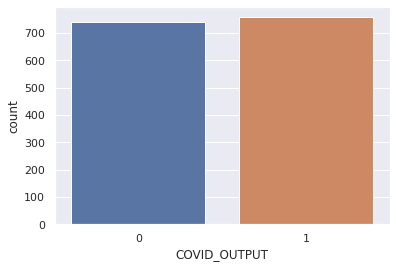

In [ ]:
sns.set(style="darkgrid")
sn.countplot(df["COVID_OUTPUT"])
plt.show()

#Split dataset 

In [ ]:
X=df.values[:,0:15]
y=df.values[:,15]

In [ ]:
X.shape


(1495, 15)

#### Spliting the dataset into test and train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [ ]:
feat_labels=['AGE', 'GENDER', 'FEVER', 'COUGH', 'FATIGUE', 'PAINS',
       'NASAL_CONGESTION', 'SHORTNESS_OF_BREATH', 'RUNNY_NOSE', 'SORE THROAT',
       'DIARRHEA', 'CHILLS', 'HEADACHE', 'VOMITING', 'LIVES_IN_AFFECTED_AREA']

#Metrics

In [ ]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity, accuracy

#AdaBoost classifier

In [ ]:
feat_cols = [2,3,4,6,10,12,14]
print(feat_cols)

abc= AdaBoostClassifier(
    DecisionTreeClassifier(random_state=20, max_depth=2,min_samples_leaf=1, min_samples_split=2 ), learning_rate=0.01,
    random_state = 208, n_estimators=1000)
abc.fit(X_train, y_train)
#Predict the response for test dataset
y_predadb = abc.predict(X_test)
accuracy_score(y_test,y_predadb)
p=precision_score(y_test, y_predadb)
r=recall_score(y_test, y_predadb)
f=f1_score(y_test, y_predadb)
auc=roc_auc_score(y_test, y_predadb)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predadb)

print("---------------------- ADABoost Classifier with NSGA-II Feature Selection------------------")

abc1= AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=6,min_samples_leaf=1, min_samples_split=2 ), learning_rate=0.01, n_estimators=1000)

abc1.fit(X_train[:,feat_cols], y_train)
y_predadb = abc1.predict(X_test[:,feat_cols])
accuracy_score(y_test,y_predadb)
p=precision_score(y_test, y_predadb)
r=recall_score(y_test, y_predadb)
f=f1_score(y_test, y_predadb)
auc=roc_auc_score(y_test, y_predadb)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predadb)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))


[2, 3, 4, 6, 10, 12, 14]
---------------------- ADABoost Classifier with NSGA-II Feature Selection------------------
Accuracy:    81.96%
Sensitivity:   88.26%
Specificity:  76.27%
Precision:  77.05%
Recall:  88.26%
F1_score: 82.28%
AUC: 82.27%


In [ ]:
confusion_matrix(y_test, y_predadb)

array([[180,  56],
       [ 25, 188]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predadb))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       236
           1       0.77      0.88      0.82       213

    accuracy                           0.82       449
   macro avg       0.82      0.82      0.82       449
weighted avg       0.83      0.82      0.82       449



#MLP Classifier

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500,activation = 'relu',solver='adam',random_state=13,validation_fraction=0.2)

In [ ]:
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=13, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False)

In [ ]:
feat_cols = [2,3,4,6,10,12,14]
print(feat_cols)


[2, 3, 4, 6, 10, 12, 14]


In [ ]:
classifier1 = MLPClassifier(hidden_layer_sizes=(30,20,20), max_iter=500,activation = 'relu',alpha=1e-5,solver='adam',random_state=16)

classifier1.fit(X_train[:,feat_cols], y_train)
y_predmlp1 = classifier1.predict(X_test[:,feat_cols])

accuracy_score(y_test,y_predmlp1)
p=precision_score(y_test, y_predmlp1)
r=recall_score(y_test, y_predmlp1)
f=f1_score(y_test, y_predmlp1)
auc=roc_auc_score(y_test, y_predmlp1)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predmlp1)
print("------------ MPL classifier Results with Feature selection-------------------")

print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))

------------ MPL classifier Results with Feature selection-------------------
Accuracy:    82.41%
Sensitivity:   88.73%
Specificity:  76.69%
Precision:  77.46%
Recall:  88.73%
F1_score: 82.71%
AUC: 82.71%


#XGBoost Classifier

In [ ]:
feat_cols = [2,3,4,6,10,12,14]
print(feat_cols)

xgboost1 = XGBClassifier(max_depth=7,learning_rate=0.1,n_estimators=1000,random_state=178, subsample= 0.9,colsample_bytree=1,
gamma= 5)
#xgboost1 = XGBClassifier(learning_rate=0.01,n_estimators=100,random_state=78,max_depth=12)

xgboost1.fit(X_train[:,feat_cols], y_train)
# make predictions for test data
predxgboost1 = xgboost1.predict(X_test[:,feat_cols])
#predictions1 = [round(value) for value in predxgboost]
# make predictions for test data
accuracy_score(y_test,predxgboost1)
p=precision_score(y_test, predxgboost1)
r=recall_score(y_test, predxgboost1)
f=f1_score(y_test, predxgboost1)
auc=roc_auc_score(y_test, predxgboost1)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, predxgboost1)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))

[2, 3, 4, 6, 10, 12, 14]
Accuracy:    82.18%
Sensitivity:   86.85%
Specificity:  77.97%
Precision:  78.06%
Recall:  86.85%
F1_score: 82.22%
AUC: 82.41%


#SVM

In [ ]:
feat_cols = [2,3,4,6,10,12,14]
print(feat_cols)
#Create a svm Classifier
SVM1 = svm.SVC(kernel='linear',C=0.01) # Linear Kernel

#Train the model using the training sets
SVM1.fit(X_train[:, feat_cols], y_train)

#Predict the response for test dataset
y_predsvm1 = SVM1.predict(X_test[:,feat_cols])
p=precision_score(y_test, y_predsvm1)
r=recall_score(y_test, y_predsvm1)
f=f1_score(y_test, y_predsvm1)
auc=roc_auc_score(y_test, y_predsvm1)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predsvm1)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))

[2, 3, 4, 6, 10, 12, 14]
Accuracy:    75.72%
Sensitivity:   76.53%
Specificity:  75.00%
Precision:  73.42%
Recall:  76.53%
F1_score: 74.94%
AUC: 75.76%


#Random Forest Classifier



In [ ]:
feat_cols = [2,3,4,6,10,12,14]
print(feat_cols)

[2, 3, 4, 6, 10, 12, 14]


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier


#Create a Gaussian Classifier
RFC1=RandomForestClassifier(n_estimators=1000,random_state=450,max_depth=5,min_samples_leaf=4)

#RFC1=RandomForestClassifier(n_estimators=2000,random_state=450)
#Train the model using the training sets y_pred=clf.predict(X_test)
RFC1.fit(X_train[:,feat_cols],y_train)
y_predrf1=RFC1.predict(X_test[:,feat_cols])
p=precision_score(y_test, y_predrf1)
r=recall_score(y_test, y_predrf1)
f=f1_score(y_test, y_predrf1)
auc=roc_auc_score(y_test, y_predrf1)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predrf1)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))


Accuracy:    81.29%
Sensitivity:   80.28%
Specificity:  82.20%
Precision:  80.28%
Recall:  80.28%
F1_score: 80.28%
AUC: 81.24%


#Logistic Regression

In [ ]:
feat_cols = [2,3,4,6,10,12,14]
print(feat_cols)

lr1 = LogisticRegression(random_state=999)
lr1.fit(X_train[:,feat_cols],y_train)
y_predlr1=lr1.predict(X_test[:,feat_cols])
p=precision_score(y_test, y_predlr1)
r=recall_score(y_test, y_predlr1)
f=f1_score(y_test, y_predlr1)
auc=roc_auc_score(y_test, y_predlr1)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predlr1)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))




[2, 3, 4, 6, 10, 12, 14]
Accuracy:    80.18%
Sensitivity:   81.69%
Specificity:  78.81%
Precision:  77.68%
Recall:  81.69%
F1_score: 79.63%
AUC: 80.25%



#Decision Tree classifier

In [ ]:
feat_cols = [2,3,4,6,10,12,14]
print(feat_cols)
dtc1 = DecisionTreeClassifier(random_state=0, max_depth=4)
dtc1.fit(X_train[:,feat_cols],y_train)
pred_dtc1=dtc1.predict(X_test[:,feat_cols])
p=precision_score(y_test, pred_dtc1)
r=recall_score(y_test, pred_dtc1)
f=f1_score(y_test, pred_dtc1)
auc=roc_auc_score(y_test, pred_dtc1)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, pred_dtc1)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))


[2, 3, 4, 6, 10, 12, 14]
Accuracy:    82.41%
Sensitivity:   87.32%
Specificity:  77.97%
Precision:  78.15%
Recall:  87.32%
F1_score: 82.48%
AUC: 82.65%


# Gradient Boosting

In [ ]:
feat_cols = [2,3,4,6,10,12,14]
print(feat_cols)
GBC1=GradientBoostingClassifier(learning_rate=1,n_estimators=100 ,max_depth=2)
GBC1.fit(X_train[:, feat_cols], y_train)
y_test_pred1 = GBC1.predict(X_test[:, feat_cols])
#accuracy_score(y_test,y_test_pred)
p=precision_score(y_test, y_test_pred1)
r=recall_score(y_test, y_test_pred1)
f=f1_score(y_test, y_test_pred1)
auc=roc_auc_score(y_test, y_test_pred1)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_test_pred1)

print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))


[2, 3, 4, 6, 10, 12, 14]
Accuracy:    82.63%
Sensitivity:   89.20%
Specificity:  76.69%
Precision:  77.55%
Recall:  89.20%
F1_score: 82.97%
AUC: 82.95%


# Area Under Curve Analysis : Without SFS



NameError: ignored

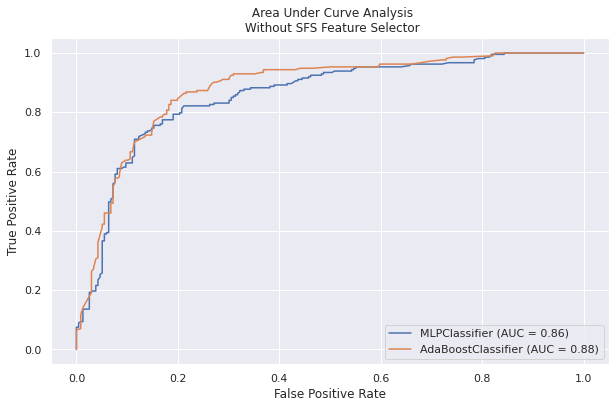

In [ ]:
plt.rcParams["figure.figsize"] = [10,6]
disp = plot_roc_curve(classifier,X_test,y_test)
plt.title(' Area Under Curve Analysis\n Without SFS Feature Selector')
plot_roc_curve(abc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(SVM,X_test,y_test,ax=disp.ax_)
plot_roc_curve(RFC,X_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(GBC,X_test,y_test,ax=disp.ax_)

# Area Under Curve Analysis : With SFS

In [ ]:
plt.rcParams["figure.figsize"] = [10,6]
feat_cols = list(sfs0.k_feature_idx_)
disp = plot_roc_curve(classifier1,X_test[:, feat_cols],y_test)
feat_cols = list(sfs1.k_feature_idx_)
plt.title(' Area Under Curve Analysis\n With SFS Feature Selector')
plot_roc_curve(abc1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs2.k_feature_idx_)
plot_roc_curve(xgboost1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs3.k_feature_idx_)
plot_roc_curve(SVM1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs4.k_feature_idx_)
plot_roc_curve(RFC1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs5.k_feature_idx_)
plot_roc_curve(lr1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs7.k_feature_idx_)
plot_roc_curve(dtc1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs8.k_feature_idx_)
plot_roc_curve(GBC1,X_test[:, feat_cols],y_test,ax=disp.ax_)